In [ ]:
import pandas as pd
data = pd.read_excel('C:\College\Algorithms\Bet.xlsx')
data.head()

In [ ]:
def multiplier(line):
    if line < 0:
        prob = ((abs(line)+100)/(abs(line)))
    else:
        prob = ((line+100)/100)
    return prob

print("Multiplier of +200 would be " + str(multiplier(100)) )
print("Multiplier of -300 would be " + str(multiplier(-300)) )

In [ ]:
def prob(line):
    if line < 0:
        prob = (abs(line)/(abs(line)+100))
    else:
        prob = (100/(line+100))
    return prob

print("Probability of +100 would be " + str(prob(100)) )
print("Probability of -300 would be " + str(prob(-300)) )

In [ ]:
data['ProbabilityA'] = data.apply(lambda row: prob(row['LineA']), axis=1)
data['ProbabilityB'] = data.apply(lambda row: prob(row['LineB']), axis=1)
data['MultiplierA'] = data.apply(lambda row: multiplier(row['LineA']), axis=1)
data['MultiplierB'] = data.apply(lambda row: multiplier(row['LineB']), axis=1)

data.head()

In [ ]:
def scoreDifference(lineA, lineB, scoreA, scoreB):
    try:
        if lineA < lineB:
            return int(scoreA) - int(scoreB)
        elif lineA > lineB:
            return int(scoreB) - int(scoreA) 
    except:
        return 0
#scoreDifference("120OT",100)
scoreDifference(-1000, 687, 120,100)

In [ ]:
data['ScoreA'] = data.apply(lambda row: row['Score'].split(':')[0], axis=1)
data['ScoreB'] = data.apply(lambda row: row['Score'].split(':')[1], axis=1)

data['ScoreDifference'] = data.apply(lambda row: scoreDifference(row['LineA'], row['LineB'], row['ScoreA'] , row['ScoreB']), axis=1)

data.head()

In [ ]:
def goodBet(lineA, lineB, scoreDifference):
    if lineA < lineB and (scoreDifference < 5 and scoreDifference > 0):
        return "Won0"
    elif lineA < lineB and (scoreDifference < 10 and scoreDifference > 0):
        return "Won1"
    elif lineA < lineB and (scoreDifference >= 10  and scoreDifference > 0):
        return "Won2"
    elif lineA < lineB and (scoreDifference > -5 and scoreDifference < 0):
        return "Lost0"
    elif lineA < lineB and (scoreDifference > -10 and scoreDifference < 0):
        return "Lost1"
    elif lineA < lineB and (scoreDifference > -5 and scoreDifference < 0):
        return "Lost2"
    elif scoreDifference == 0:
        return "push"
    
print(goodBet(-1000,687, -5))

In [ ]:
data['Bet'] = data.apply(lambda row: goodBet(row['LineA'], row['LineB'], row['ScoreDifference']), axis=1)
data.head()

In [ ]:
new = data.filter(['MultiplierA', 'ScoreDifference'], axis=1)
new.head()

In [ ]:
from copy import deepcopy
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

In [ ]:
f1 = data['MultiplierA'].values
f2 = data['ScoreDifference'].values
X = np.array(list(zip(f1, f2)))
plt.scatter(f1, f2, c='black', s=7)

In [ ]:
# Euclidean Distance Caculator
def dist(a, b, ax=1):
    return np.linalg.norm(a - b, axis=ax)

# Number of clusters
k = 1
# X coordinates of random centroids
C_x = np.random.randint(0, np.max(X)-20, size=k)
# Y coordinates of random centroids
C_y = np.random.randint(0, np.max(X)-20, size=k)
C = np.array(list(zip(C_x, C_y)), dtype=np.float32)
print(C)

# Plotting along with the Centroids
plt.scatter(f1, f2, c='#050505', s=7)
plt.scatter(C_x, C_y, marker='*', s=200, c='g')

In [36]:
import pandas as pd
df = pd.read_excel(r'C:\Users\Matt\ProbLineData.xlsx')
df.head()

,TeamAScore,TeamBScore,TeamAline,TeamBline
0,86,99,-167,+144
1,91,99,-123,-101
2,108,104,-204,+173
3,101,96,-345,+269
4,100,75,-294,+242


In [37]:
df.hist(column='TeamAline', bins=100)

ValueError: num must be 1 <= num <= 0, not 1

<Figure size 432x288 with 0 Axes>

In [ ]:
df.hist(column='TeamBline', bins=100)

In [ ]:
df["Outcome"] = df["TeamAScore"] - df["TeamBScore"]
df.head()

In [ ]:
df["OutcomeA"] = df["Outcome"]
df["OutcomeB"] = df["Outcome"]
df.head()

In [ ]:
def OutcomeA(row):
    if row['Outcome'] < 0:
        val = "Loss"
    elif row['Outcome'] > 0:
        val = "Win"
    else:
        val = "push"
    return val
df['OutcomeA'] = df.apply(OutcomeA, axis=1)

def OutcomeB(row):
    if row['Outcome'] > 0:
        val = "Loss"
    elif row['Outcome'] < 0:
        val = "Win"
    else:
        val = "push"
    return val
df['OutcomeB'] = df.apply(OutcomeB, axis=1)

df.head()

In [38]:
df2 = df[['TeamAline', 'OutcomeA']]
df2

KeyError: "['OutcomeA'] not in index"

In [39]:
df3 = df[['TeamBline', 'OutcomeB']]
df3

KeyError: "['OutcomeB'] not in index"

In [40]:
df2["Line"] = df2["TeamAline"]
df2["Outcome"] = df2["OutcomeA"]
df2.head()

,TeamAline,OutcomeA,Line,Outcome
0,-167,Loss,-167,Loss
1,-123,Loss,-123,Loss
2,-204,Win,-204,Win
3,-345,Win,-345,Win
4,-294,Win,-294,Win


In [41]:
df3["Line"] = df3["TeamBline"]
df3["Outcome"] = df3["OutcomeB"]
df3.head()

,TeamBline,OutcomeB,Line,Outcome
0,144,Win,144,Win
1,-101,Win,-101,Win
2,173,Loss,173,Loss
3,269,Loss,269,Loss
4,242,Loss,242,Loss


In [42]:
dfA = df2[['Line', 'Outcome']]
dfA.head()

,Line,Outcome
0,-167,Loss
1,-123,Loss
2,-204,Win
3,-345,Win
4,-294,Win


In [43]:
dfB = df3[['Line', 'Outcome']]
dfB.head()

,Line,Outcome
0,144,Win
1,-101,Win
2,173,Loss
3,269,Loss
4,242,Loss


In [44]:
frames = [dfA, dfB]
result = pd.concat(frames)
result

,Line,Outcome
0,-167,Loss
1,-123,Loss
2,-204,Win
3,-345,Win
4,-294,Win
5,-135,Win
6,-217,Loss
7,-417,Win
8,-263,Win
9,100,Win


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002045A278828>]],
      dtype=object)

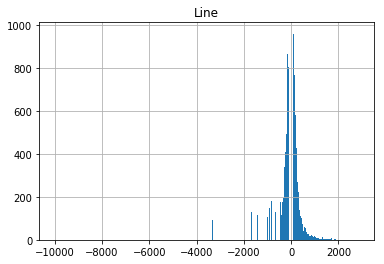

In [45]:
result.hist(column='Line', bins=1000)

In [46]:
writer = pd.ExcelWriter('LineData.xlsx')
result.to_excel(writer,'Sheet1')
writer.save()

In [47]:
import pandas as pd
dfLineOutcome = pd.read_excel(r'C:\Users\Matt\LineData.xlsx')
dfLineOutcome

,Line,Outcome
0,-167,Loss
1,-123,Loss
2,-204,Win
3,-345,Win
4,-294,Win
5,-135,Win
6,-217,Loss
7,-417,Win
8,-263,Win
9,100,Win


In [49]:
import pandas as pd
dfLines = pd.read_excel(r'C:\Users\Matt\DistinctLines.xlsx')
dfLines.head()

,Line
0,-167
1,-123
2,-204
3,-345
4,-294


In [50]:
def BinaryOutcome(row):
    if row['Outcome'] == "Loss":
        val = 0
    elif row['Outcome'] == "Win":
        val = "1"
    else:
        val = "push"
    return val
dfLineOutcome['BinaryOutcome'] = dfLineOutcome.apply(BinaryOutcome, axis=1)
dfLineOutcome.head()

,Line,Outcome,BinaryOutcome
0,-167,Loss,0
1,-123,Loss,0
2,-204,Win,1
3,-345,Win,1
4,-294,Win,1


In [51]:
dfLineOutcome = dfLineOutcome[['Line', 'BinaryOutcome']]
dfLineOutcome.head()

,Line,BinaryOutcome
0,-167,0
1,-123,0
2,-204,1
3,-345,1
4,-294,1


In [52]:
dfLines.head()

,Line
0,-167
1,-123
2,-204
3,-345
4,-294


In [53]:
dfWin = dfLineOutcome[(dfLineOutcome['Line'] == -120)]
dfWin["BinaryOutcome"] = pd.to_numeric(dfWin["BinaryOutcome"])
dfWin.head()
sumWins = dfWin['BinaryOutcome'].sum()
sumWins

c:\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


60

In [54]:
dfLineOutcome[dfLineOutcome["Line"]== -120].count()["BinaryOutcome"]

108

In [55]:
#**********************************************************************************************************************

In [56]:
my_list = dfLines["Line"].values
my_list

array([-167, -123, -204, ..., 1619, 1702,  905], dtype=int64)

In [167]:
totalList = []
for i in range(335):
    line = my_list[i]
    totalList.append(dfLineOutcome[dfLineOutcome["Line"]== i].count()["BinaryOutcome"])
totalList

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 210,
 0,
 30,
 0,
 210,
 0,
 180,
 0,
 210,
 0,
 210,
 0,
 270,
 0,
 150,
 0,
 30,
 60,
 90,
 60,
 60,
 240,
 60,
 210,
 0,
 210,
 0,
 330,
 0,
 180,
 0,
 30,
 0,
 60,
 30,
 60,
 60,
 30,
 90,
 60,
 30,
 90,
 0,
 60,
 60,
 60,
 30,
 30,
 60,
 30,
 60,
 0,
 90,
 0,
 150,
 0,
 60,
 0,
 30,
 90,
 30,
 60,
 30,
 60,
 60,
 210,
 60,
 60,
 60,
 30,
 90,
 30,
 120,
 150,
 60,
 210,
 0,
 90,
 0,
 180,
 0,
 180,
 0,
 60,
 60,
 120,
 90,
 30,
 90,
 120,
 120,
 60,
 60,
 60,
 30,
 30,
 60,
 60,
 90,
 0,
 60,
 0,
 90,
 0,
 30,
 0,
 120,
 0,
 60,
 120,
 60,
 30,
 30,
 0,
 30,
 90,
 30,
 90,
 0,
 0,
 30,
 

In [168]:
winList = []
for i in range(335):
    dfWin = dfLineOutcome[(dfLineOutcome['Line'] == i)]
    dfWin["BinaryOutcome"] = pd.to_numeric(dfWin["BinaryOutcome"])
    sumWins = dfWin['BinaryOutcome'].sum()
    winList.append(sumWins)
winList

c:\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 120,
 0,
 0,
 0,
 90,
 0,
 60,
 0,
 90,
 0,
 90,
 0,
 120,
 0,
 60,
 0,
 0,
 30,
 30,
 60,
 30,
 60,
 30,
 90,
 0,
 120,
 0,
 180,
 0,
 0,
 0,
 0,
 0,
 0,
 30,
 30,
 30,
 0,
 30,
 60,
 0,
 90,
 0,
 0,
 60,
 30,
 0,
 30,
 30,
 0,
 30,
 0,
 30,
 0,
 90,
 0,
 30,
 0,
 30,
 60,
 0,
 0,
 0,
 60,
 30,
 90,
 0,
 0,
 60,
 0,
 0,
 0,
 30,
 60,
 0,
 120,
 0,
 0,
 0,
 0,
 0,
 60,
 0,
 0,
 0,
 30,
 0,
 0,
 30,
 60,
 60,
 30,
 30,
 0,
 30,
 0,
 60,
 30,
 60,
 0,
 30,
 0,
 0,
 0,
 0,
 0,
 30,
 0,
 0,
 0,
 30,
 0,
 30,
 0,
 0,
 0,
 30,
 60,
 0,
 0,
 0,
 0,
 30,
 0,
 0,
 30,
 0,
 0,
 0,
 60,
 0,
 0,
 0,
 0,


In [169]:
# finaldf = pd.DataFrame(columns=['Line','Wins','TotalBets'])
# print(finaldf.head())

# for i in range(335):
# #     line = my_list[i]
# #     finaldf = finaldf.append([{'Line':line}], ignore_index=True)
#     dfWin = dfLineOutcome[(dfLineOutcome['Line'] == i)]
#     dfWin["BinaryOutcome"] = pd.to_numeric(dfWin["BinaryOutcome"])
#     sumWins = dfWin['BinaryOutcome'].sum()
#     sumWins
#     finaldf = finaldf.append([{'Wins':sumWins}], ignore_index=True)


# finaldf

In [176]:
dfdf1 = pd.DataFrame()
dfdf1['Line'] = my_list
dfdf1

dfdf2 = pd.DataFrame()
dfdf2['winList'] = winList
dfdf2

dfdf3 = pd.DataFrame()
dfdf3['totalList'] = totalList
dfdf3

,totalList
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0
